<h1><font size="8"><b>Major Project</b></font><h1>

<p><font size="5">Importing basic libraries</font><p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt
%matplotlib inline

<p><font size="4">Reading csv file</font><p>

In [2]:
df1=pd.read_csv("Information.csv", encoding="latin1")
df1.drop_duplicates(subset ="name",keep="last",inplace=True)


<p><font size="4">Filtering the data by specifying requiremental condition</font><p>

In [3]:
df1=df1[df1["tweet_count"]>2000]
df1=df1[df1["gender"]!="unknown"]
df1= df1[df1['gender:confidence'] == 1]


In [4]:
df1.dropna(subset = ['_last_judgment_at'], inplace = True)
for i in df1['_last_judgment_at']:
    df1['_last_judgment_at'] = df1['_last_judgment_at'].replace(i, i[:9])
for i in df1['created']:
    df1['created'] = df1['created'].replace(i, i[:7])


<p><font size="4">Converting columns with individual strings to nuerical value by label encoding </font><p>

In [5]:
from sklearn.preprocessing import LabelEncoder


In [6]:
le = LabelEncoder()

In [7]:
df1['gender1'] = le.fit_transform(df1['gender']) 
df1['_last_judgment_at1'] = le.fit_transform(df1['_last_judgment_at'])
df1['profileimage1'] = le.fit_transform(df1['profileimage'])
df1['link_color1'] = le.fit_transform(df1['link_color'])
df1['created1'] = le.fit_transform(df1['created'])

<p><font size="4">Fill the missing values in data</font><p>

In [8]:
df1=df1.fillna(0)

In [9]:
df1.describe().columns

Index(['_unit_id', '_trusted_judgments', 'gender:confidence',
       'profile_yn:confidence', 'fav_number', 'gender_gold', 'profile_yn_gold',
       'retweet_count', 'tweet_count', 'tweet_id', 'gender1',
       '_last_judgment_at1', 'profileimage1', 'link_color1', 'created1'],
      dtype='object')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9796 entries, 0 to 19999
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               9796 non-null   int64  
 1   _golden                9796 non-null   bool   
 2   _unit_state            9796 non-null   object 
 3   _trusted_judgments     9796 non-null   int64  
 4   _last_judgment_at      9796 non-null   object 
 5   gender                 9796 non-null   object 
 6   gender:confidence      9796 non-null   float64
 7   profile_yn             9796 non-null   object 
 8   profile_yn:confidence  9796 non-null   float64
 9   created                9796 non-null   object 
 10  description            9796 non-null   object 
 11  fav_number             9796 non-null   int64  
 12  gender_gold            9796 non-null   int64  
 13  link_color             9796 non-null   object 
 14  name                   9796 non-null   object 
 15  pro

<h4><font size="5">Feature Selection</font><h4>

<p><font size="4"><i>Univariate Selection</i></font><p>

In [11]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [12]:
X=df1[['_unit_id', '_trusted_judgments', 'gender:confidence',
       'profile_yn:confidence', 'fav_number', 'retweet_count', 'tweet_count',
       'tweet_id', '_last_judgment_at1', 'profileimage1',
       'link_color1', 'created1']]#independent variable
y=df1[['gender1']]#dependent variable

In [13]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) 

                 Specs         Score
7             tweet_id  6.624813e+09
6          tweet_count  3.923510e+07
4           fav_number  8.010563e+06
9        profileimage1  4.464588e+06
10         link_color1  3.076321e+05
11            created1  1.099925e+04
5        retweet_count  2.073884e+02
0             _unit_id  4.009273e+00
8   _last_judgment_at1  3.947856e+00
1   _trusted_judgments  1.086394e-28


<p><font size="4"><i>Feature Importance</i></font><p>

C:\Users\Administrator\Downloads\WPy64-3771\python-3.7.7.amd64\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.14169178 0.         0.         0.         0.15736642 0.01636701
 0.144972   0.0107218  0.01845954 0.25486273 0.11847669 0.13708203]


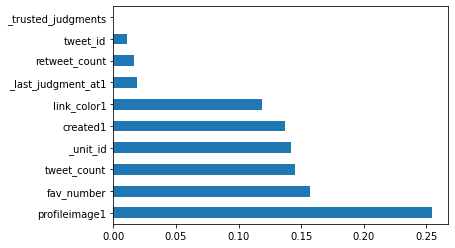

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


<p><font size="3">Defining new data with top features</font><p>

In [15]:
df2=df1[['_unit_id', 'fav_number', 'tweet_count', 'profileimage1',  'profile_yn:confidence',
       'link_color1', 'created1','gender1','text','description']]

In [16]:
df2.head()

,_unit_id,fav_number,tweet_count,profileimage1,profile_yn:confidence,link_color1,created1,gender1,text,description
0,815719226,0,110964,1205,1.0,176,510,2,Robbie E Responds To Critics After Win Against...,i sing my own rhythm.
1,815719227,68,7471,2258,1.0,56,226,2,ÛÏIt felt like they were my friends and I was...,I'm the author of novels filled with family dr...
4,815719230,37318,31462,2582,1.0,691,1032,1,Watching Neighbours on Sky+ catching up with t...,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
5,815719231,3901,20036,7401,1.0,1820,764,1,"Ive seen people on the train with lamps, chair...",you don't know me.
6,815719232,4122,13354,2145,1.0,535,1097,0,@BpackEngineer Thank you for your patience whi...,"A global marketplace for images, videos and mu..."


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9796 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   _unit_id               9796 non-null   int64  
 1   fav_number             9796 non-null   int64  
 2   tweet_count            9796 non-null   int64  
 3   profileimage1          9796 non-null   int32  
 4   profile_yn:confidence  9796 non-null   float64
 5   link_color1            9796 non-null   int32  
 6   created1               9796 non-null   int32  
 7   gender1                9796 non-null   int32  
 8   text                   9796 non-null   object 
 9   description            9796 non-null   object 
dtypes: float64(1), int32(4), int64(3), object(2)
memory usage: 688.8+ KB


<p><font size="4">Avoiding error"int cannot be converted to lower"</font><p>

In [18]:
 df2.text = [str (item) for item in df2.text]
 df2.text = [item for item in df2.text if not isinstance(item, int)]  

C:\Users\Administrator\Downloads\WPy64-3771\python-3.7.7.amd64\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [19]:
 df2.description = [str (item) for item in df2.description]
 df2.description = [item for item in df2.description if not isinstance(item, int)]

<h3><font size="5">Bag of words</font><h3>
<ol><li><p><font size="4">Cleaning data</font><p></li>
    <li>Text Processing</li>
    <li>Breaking down strings into meaning full words</li>
</ol>

In [20]:

def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

df2['Tweets'] = [cleaning(s) for s in df2['text']]
df2['Description'] = [cleaning(s) for s in df2['description']]

from nltk.corpus import stopwords
#searching a set is much faster than searching a list, so convert the stop words to a set
stop = set(stopwords.words('english'))
df2['Tweets'] = df2['Tweets'].str.split()
# Remove stop words
#Join the words back into one string separated by space, and return the result.
df2['Tweets'] = df2['Tweets'].apply(lambda x : [item for item in x if item not in stop])
df2['Description'] = df2['Description'].str.lower().str.split()
df2['Description'] = df2['Description'].apply(lambda x : [item for item in x if item not in stop])
df2=df2.drop(['text', 'description'], axis=1)
df2

C:\Users\Administrator\Downloads\WPy64-3771\python-3.7.7.amd64\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\Administrator\Downloads\WPy64-3771\python-3.7.7.amd64\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Administrator\Downloads\WPy64-3771\python-3.7.7.amd64\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,_unit_id,fav_number,tweet_count,profileimage1,profile_yn:confidence,link_color1,created1,gender1,Tweets,Description
0,815719226,0,110964,1205,1.0,176,510,2,"[robbie, e, responds, critics, win, eddie, edw...","[sing, rhythm]"
1,815719227,68,7471,2258,1.0,56,226,2,"[ûïit, felt, like, friends, living, story, û, ...","[author, novels, filled, family, drama, romance]"
4,815719230,37318,31462,2582,1.0,691,1032,1,"[watching, neighbours, sky, catching, neighbs,...","[ricky, wilson, best, frontman, kaiser, chiefs..."
5,815719231,3901,20036,7401,1.0,1820,764,1,"[ive, seen, people, train, lamps, chairs, tvs,...",[know]
6,815719232,4122,13354,2145,1.0,535,1097,0,"[bpackengineer, thank, patience, take, care, i...","[global, marketplace, images, videos, music, s..."
...,...,...,...,...,...,...,...,...,...,...
19994,815739589,3745,10727,8739,1.0,1897,1751,1,"[nothing, like, slipping, school, running, car...","[let, faith, bigger, fear, ï, send]"
19995,815739590,33834,29190,6296,1.0,1315,117,2,"[seriously, love, trent, justin, would, anythi...",[xxi]
19996,815739591,2462,11117,4244,1.0,56,462,2,"[one, person, look, like, beautiful, thing, in...","[money, making, take, day, time, r, p, july, t..."
19997,815739592,1855,5640,7760,1.0,940,1025,1,"[wedding, photobombs, made, bride, groom, day,...","[quote, insert, movie, better, friends]"


In [21]:
u= []
for tweet in df2['Tweets']:
    me = ""
    for word in tweet:
        if not word=='http' and not word=='nan' and not word=='û' and not word=='êû':
            me += word+" "
    u.append(me)
df2['clean_Tweets'] = u


t = []
for tweet in df2['Description']:
    me = ""
    for word in tweet:
        if not word=='http' and not word=='nan' and not word=='û' and not word=='êû':
            me += word+" "
    t.append(me)
df2['clean_description'] = t

In [22]:
 df2.clean_Tweets = [str (item) for item in df2.clean_Tweets]
 df2.clean_Tweets = [item for item in df2.clean_Tweets if not isinstance(item, int)]  
 df2.clean_description = [str (item) for item in df2.clean_description]
 df2.clean_description = [item for item in df2.clean_description if not isinstance(item, int)]  

In [23]:
df2.head()

,_unit_id,fav_number,tweet_count,profileimage1,profile_yn:confidence,link_color1,created1,gender1,Tweets,Description,clean_Tweets,clean_description
0,815719226,0,110964,1205,1.0,176,510,2,"[robbie, e, responds, critics, win, eddie, edw...","[sing, rhythm]",robbie e responds critics win eddie edwards wo...,sing rhythm
1,815719227,68,7471,2258,1.0,56,226,2,"[ûïit, felt, like, friends, living, story, û, ...","[author, novels, filled, family, drama, romance]",ûïit felt like friends living story arngeyhno ...,author novels filled family drama romance
4,815719230,37318,31462,2582,1.0,691,1032,1,"[watching, neighbours, sky, catching, neighbs,...","[ricky, wilson, best, frontman, kaiser, chiefs...",watching neighbours sky catching neighbs xxx ù...,ricky wilson best frontman kaiser chiefs best ...
5,815719231,3901,20036,7401,1.0,1820,764,1,"[ive, seen, people, train, lamps, chairs, tvs,...",[know],ive seen people train lamps chairs tvs etc wzf...,know
6,815719232,4122,13354,2145,1.0,535,1097,0,"[bpackengineer, thank, patience, take, care, i...","[global, marketplace, images, videos, music, s...",bpackengineer thank patience take care issue,global marketplace images videos music sharing...


<p><font size="5">Most common words used by Males</font><p>

In [24]:
Male = df2[df1['gender'] == 'male']
Female = df2[df1['gender'] == 'female']
Male_words = pd.Series(' '.join(Male['Tweets'].astype(str)).lower().split(" ")).value_counts()[:45]
Female_words = pd.Series(' '.join(Female['Tweets'].astype(str)).lower().split(" ")).value_counts()[:45]

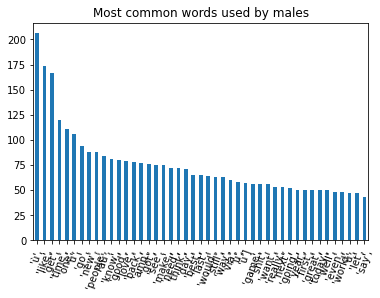

In [25]:
Male_words.plot.bar(rot=70, title="Most common words used by males");
plt.rcParams['figure.figsize']= (10,6)
plt.show(block=True);

In [52]:
Male_words

'ù',         206
'like',      174
'get',       167
'time',      120
'one',       111
'û',         106
'go',         94
'new',        88
'people',     88
'âù',         84
'know',       81
'good',       80
'love',       79
'back',       78
'amp',        77
'got',        76
'see',        75
'make',       75
'need',       72
'think',      72
'day',        71
'best',       65
'last',       65
'would',      64
'still',      63
'way',        63
'via',        60
'u',          58
'ù']          57
'game',       56
'shit',       56
'want',       56
'really',     53
'next',       53
'going',      52
'year',       50
'first',      50
'great',      50
'today',      50
'well',       50
'even',       48
'world',      48
'ü',          47
'let',        47
'say',        43
dtype: int64

<p><font size="5">Most common words used by Females</font><p>

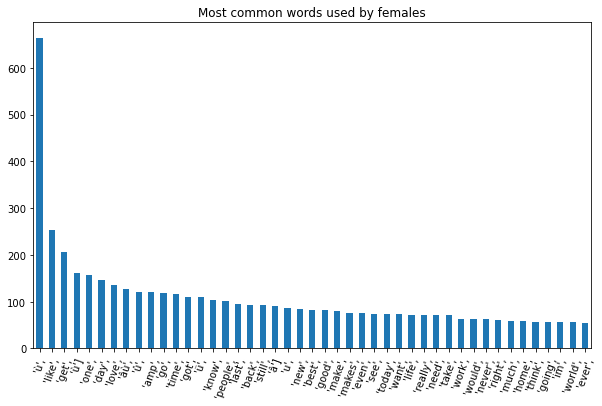

In [26]:
Female_words.plot.bar(rot=70, title="Most common words used by females");
plt.rcParams['figure.figsize']= (10,6)
plt.show(block=True);

In [53]:
Female_words

'ù',         664
'like',      253
'get',       207
'ù']         162
'one',       156
'day',       147
'love',      135
'âù',        128
'û',         120
'amp',       120
'go',        119
'time',      116
'got',       111
'ü',         111
'know',      103
'people',    101
'last',       96
'back',       93
'still',      93
'â']          90
'u',          86
'new',        84
'best',       83
'good',       82
'make',       80
'makes',      75
'even',       75
'see',        74
'today',      73
'want',       73
'life',       72
'really',     72
'need',       71
'take',       71
'work',       64
'would',      63
'never',      63
'right',      60
'much',       59
'home',       59
'think',      57
'going',      56
'im',         56
'world',      56
'ever',       54
dtype: int64

<p><font size="5">Timings in a day when most Females tweet</font><p>

In [27]:

df1=df1[df1['tweet_created'].notnull()]
df1['tweet_created']=pd.to_datetime(df1['tweet_created'])

12:40:00    1371
13:19:00    1364
13:20:00     813
12:39:00     283
13:18:00      80
Name: tweet_created, dtype: int64


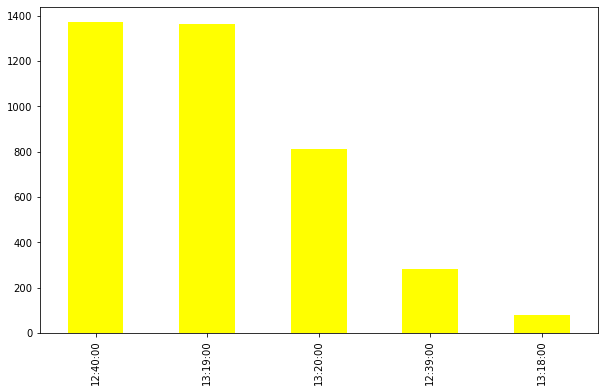

In [28]:
fm=df1[df1.gender=='female']

fm=fm.tweet_created.dt.time
print(fm.value_counts())
fm=fm.value_counts()
fm.plot(kind='bar',stacked=True ,color='yellow')

<p><font size="5">Timings in a when most Males tweet</font><p>

12:40:00    1413
13:19:00     984
13:20:00     601
12:39:00     298
13:18:00      51
Name: tweet_created, dtype: int64


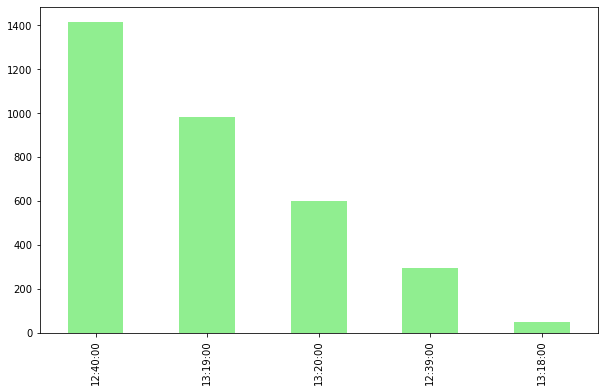

In [29]:
ma=df1[df1.gender=='male']
ma=ma.tweet_created.dt.time
print(ma.value_counts())
ma=ma.value_counts()
ma.plot(kind='bar',stacked=True ,color='lightgreen')

In [30]:
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(analyzer = "word",   \
#                              tokenizer = None,    \
#                              preprocessor = None, \
#                              stop_words = None,   \
#                              max_features = 5000,lowercase=False) 

# # fit_transform() does two functions: First, it fits the model
# # and learns the vocabulary; second, it transforms our training data
# # into feature vectors. The input to fit_transform should be a list of 
# # strings.
# train_Tweet_features = vectorizer.fit_transform(df2.clean_Tweets)

# # Numpy arrays are easy to work with, so convert the result to an 
# # array
# # train_Tweet_features = train_Tweet_features.toarray()

# # see final the clean data
# print (train_Tweet_features.shape)

<h2><font size="6">Logistic Regression</font><h2>

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()
y = le.fit_transform(df2['gender1'])

In [33]:
cv= CountVectorizer(binary=True, max_df=0.97)
X = cv.fit_transform(df2['clean_Tweets'].values)
X=cv.fit_transform(df2['clean_description'].values)



In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y)

lr.fit(X_train,Y_train)

LogisticRegression(max_iter=10000)

In [35]:
lr.score(X_train,Y_train)

0.8953314277936573

<h2><font size="6">Random Forest</font><h2>

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [37]:
X=df2[['_unit_id', 'fav_number', 'tweet_count', 'profileimage1',  'profile_yn:confidence',
       'link_color1', 'created1']]
Y=df2['gender1']

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [39]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200)

In [40]:
Y_pred = rfc.predict(X_test)

In [41]:
accuracy_score(Y_test, Y_pred)

0.6031033074724377

In [42]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67       627
           1       0.63      0.67      0.65       991
           2       0.51      0.48      0.49       831

    accuracy                           0.60      2449
   macro avg       0.61      0.60      0.60      2449
weighted avg       0.60      0.60      0.60      2449



<h2><font size="6">Naives Bayes</font><h2>

In [43]:
import matplotlib.pyplot as plt
import random
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 

  

In [44]:
chosen_rows = df1[df1["gender"].isin(["male", "female"]) & (df1["gender:confidence"] > 0.99)].index.tolist()

In [45]:
n_samples = len(chosen_rows)
random.shuffle(chosen_rows)
test_size = round(n_samples*0.2)
test_rows = chosen_rows[:test_size]
val_rows = chosen_rows[test_size:2*test_size]
train_rows = chosen_rows[2*test_size:]
len(chosen_rows)

7258

In [46]:
def normalize_text(text):
    
    text = re.sub(r'[^\x00-\x7F]+',' ', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', ' ', text)
    text = re.sub(r'[?!+%{}:;.,"\'()\[\]_]', '',text)
    text = re.sub(r'\s+',' ',text)
    return text

In [47]:
df1["text_norm"] = [normalize_text(text) for text in df1["text"]]

In [48]:
vectorizer = CountVectorizer()
vectorizer = vectorizer.fit(df1.loc[train_rows, :]["text_norm"])

In [49]:
encoder = LabelEncoder()
X_train = vectorizer.transform(df1.loc[train_rows, "text_norm"])
X_val = vectorizer.transform(df1.loc[val_rows, "text_norm"])
y_train = encoder.fit_transform(df1.loc[train_rows, "gender"])
y_val = encoder.transform(df1.loc[val_rows, "gender"])

In [50]:
nb = MultinomialNB()
nb = nb.fit(X_train, y_train)

In [51]:
accuracy_score(y_val, nb.predict(X_val))

0.6081267217630854